In [1]:
#%%
import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\Masteroppgave\w3tp")
import w3t
import os
import h5py
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

import pandas as pd

 
tic = time.perf_counter()
plt.close("all")

In [2]:
section_height = 0.0667
section_width = 0.365
section_length_1 = 2.68
section_length_2 = 2.66

# Use LaTeX font rendering (Computer Modern Roman)
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']
 
# Generelt større og mer lesbar tekst
mpl.rcParams.update({
    'font.size': 14,              # Generell tekststørrelse
    'axes.labelsize': 14,         # Aksetitler
    'axes.titlesize': 16,         # Plot-titler
    'legend.fontsize': 12,        # Tekst i legend
    'xtick.labelsize': 12,        # X-tick labels
    'ytick.labelsize': 12         # Y-tick labels
})

In [3]:
#2D
section_name_US = "MDS_2D_Harmonic"
section_name_DS = "MUS_2D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)


['HAR_INT_MDS_GAP_213D_03_01_01_000', 'HAR_INT_MDS_GAP_213D_03_01_01_001', 'HAR_INT_MDS_GAP_213D_03_01_01_002', 'HAR_INT_MDS_GAP_213D_03_01_02_000', 'HAR_INT_MDS_GAP_213D_03_01_02_001', 'HAR_INT_MDS_GAP_213D_03_01_02_003', 'HAR_INT_MDS_GAP_213D_03_01_03_000', 'HAR_INT_MDS_GAP_213D_03_01_03_001', 'HAR_INT_MDS_GAP_213D_03_01_03_002', 'HAR_INT_MDS_GAP_213D_03_01_04_000', 'HAR_INT_MDS_GAP_213D_03_01_04_001', 'HAR_INT_MDS_GAP_213D_03_01_04_002']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11], dtype=int64)]
['HAR_INT_MUS_GAP_213D_03_01_01_000', 'HAR_INT_MUS_GAP_213D_03_01_01_001', 'HAR_INT_MUS_GAP_213D_03_01_01_004', 'HAR_INT_MUS_GAP_213D_03_01_02_000', 'HAR_INT_MUS_GAP_213D_03_01_02_001', 'HAR_INT_MUS_GAP_213D_03_01_02_003', 'HAR_INT_MUS_GAP_213D_03_01_03_001', 'HAR_INT_MUS_GAP_213D_03_01_03_002', 'HAR_INT_MUS_GAP_213D_03_01_03_003', 'HAR_INT_MUS_GAP_213D_03_01_04_000', 'HAR_INT_MUS_GAP_213D_03_01_04_001', 'HAR_INT_MUS_GAP_21

Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_01_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_01_003
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_02_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_02_003
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_03_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_03_004
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_04_003


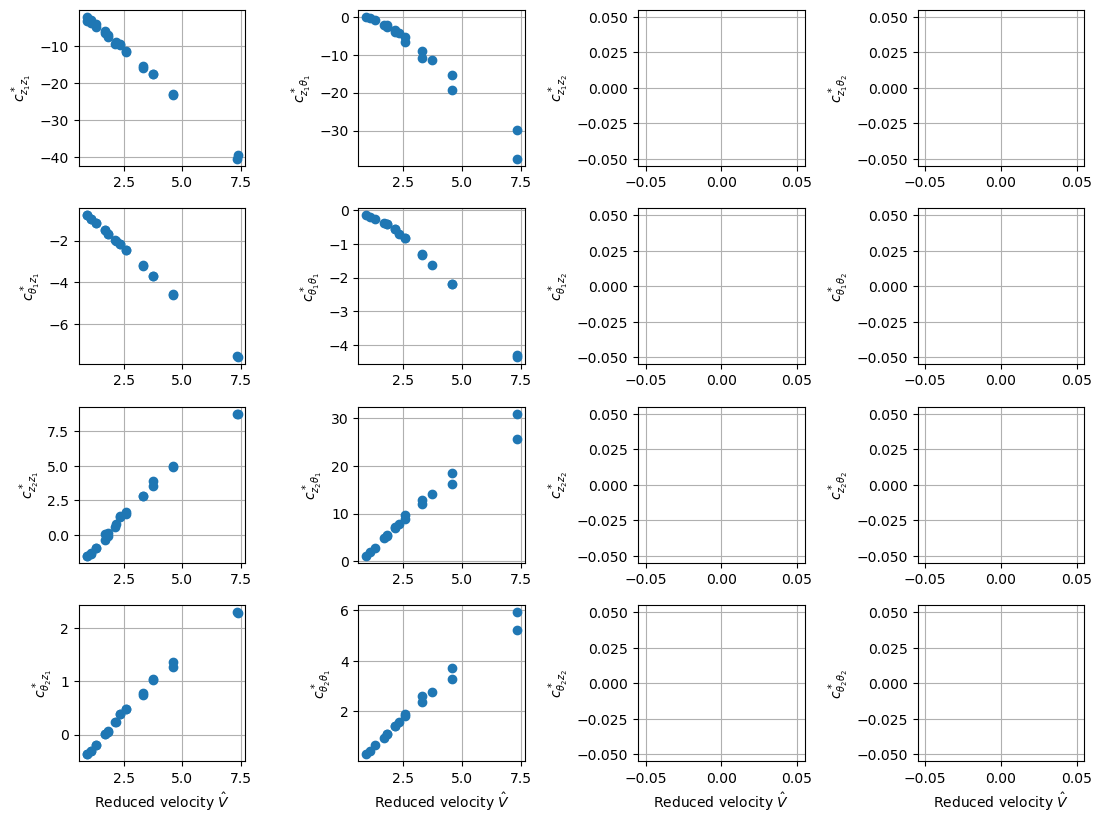

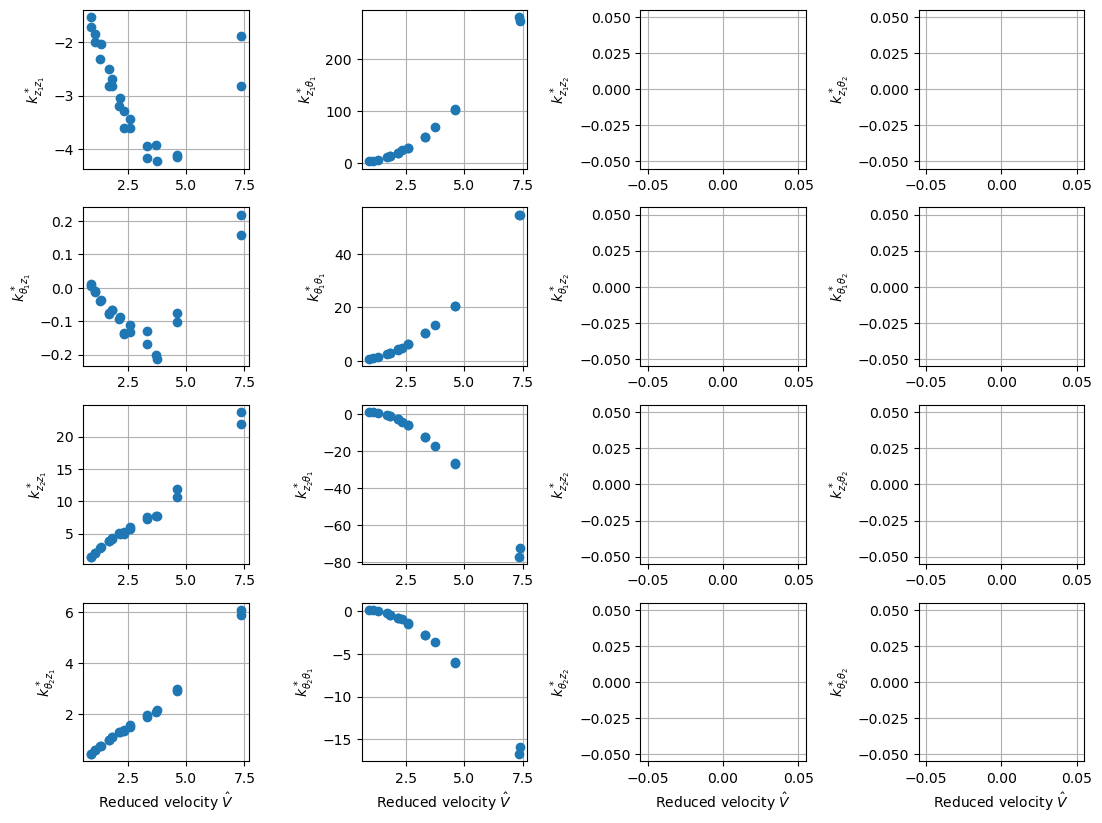

In [ ]:
ads_list = []
val_list = []
expf_list = []

fig_damping_2D, _ = plt.subplots(4,4)
fig_stiffness_2D, _ = plt.subplots(4,4)

all_ads_gap2D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap2D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap2D.append(ads_DS)

all_ads_gap2D.plot(fig_damping = fig_damping_2D, fig_stiffness=fig_stiffness_2D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_2D_damping.png')
fig_damping_2D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_2D_stiffness.png')
fig_stiffness_2D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

In [5]:
#1D
section_name_US = "MDS_1D_Harmonic"
section_name_DS = "MUS_1D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)


['HAR_INT_MDS_GAP_213D_03_02_01_001', 'HAR_INT_MDS_GAP_213D_03_02_01_002', 'HAR_INT_MDS_GAP_213D_03_02_02_000', 'HAR_INT_MDS_GAP_213D_03_02_02_001', 'HAR_INT_MDS_GAP_213D_03_02_03_000', 'HAR_INT_MDS_GAP_213D_03_02_03_001', 'HAR_INT_MDS_GAP_213D_03_02_04_000', 'HAR_INT_MDS_GAP_213D_03_02_04_001']
[array([0, 1], dtype=int64), array([2, 3], dtype=int64), array([4, 5], dtype=int64), array([6, 7], dtype=int64)]
['HAR_INT_MUS_GAP_213D_03_03_01_000', 'HAR_INT_MUS_GAP_213D_03_03_01_001', 'HAR_INT_MUS_GAP_213D_03_03_01_002', 'HAR_INT_MUS_GAP_213D_03_03_02_000', 'HAR_INT_MUS_GAP_213D_03_03_02_001', 'HAR_INT_MUS_GAP_213D_03_03_02_002', 'HAR_INT_MUS_GAP_213D_03_03_03_000', 'HAR_INT_MUS_GAP_213D_03_03_03_001', 'HAR_INT_MUS_GAP_213D_03_03_03_002', 'HAR_INT_MUS_GAP_213D_03_03_04_000', 'HAR_INT_MUS_GAP_213D_03_03_04_001', 'HAR_INT_MUS_GAP_213D_03_03_04_002']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11], dtype=int64)]


Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_02_01_002
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_03_01_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_03_01_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_02_02_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_03_02_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_03_02_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_02_03_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_03_03_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_03_03_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_02_04_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_03_04_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_03_04_002


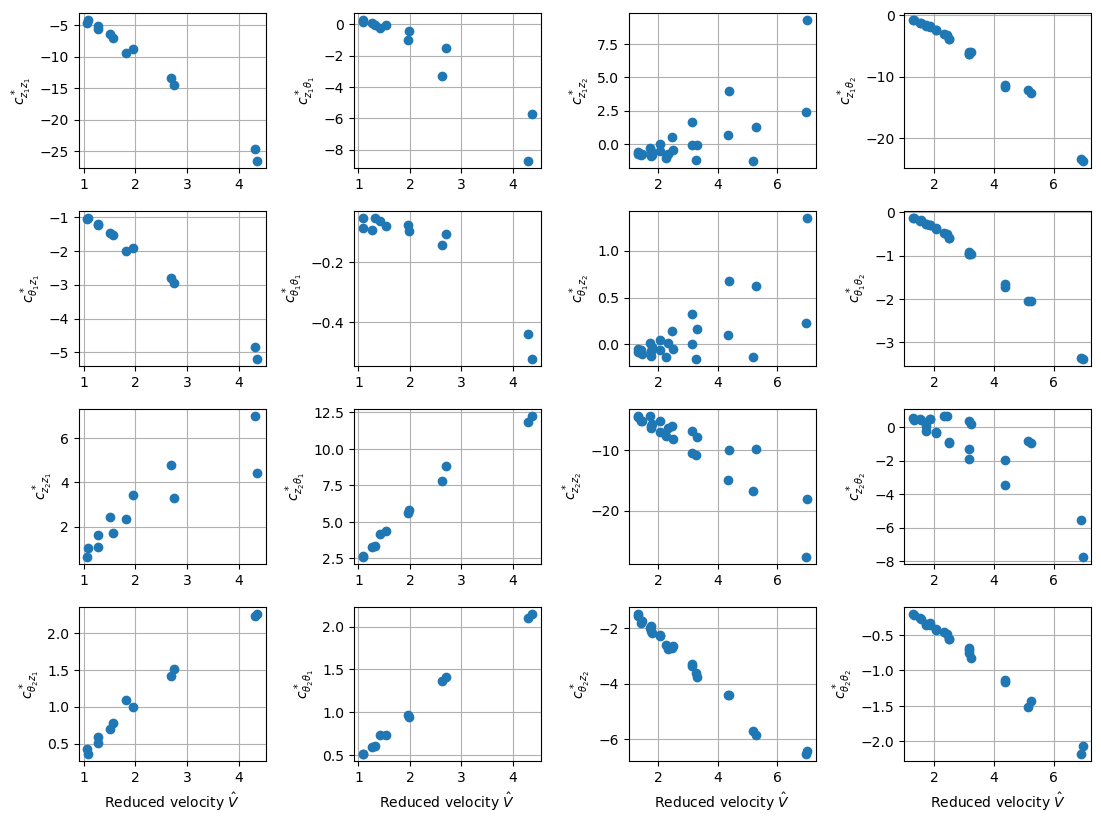

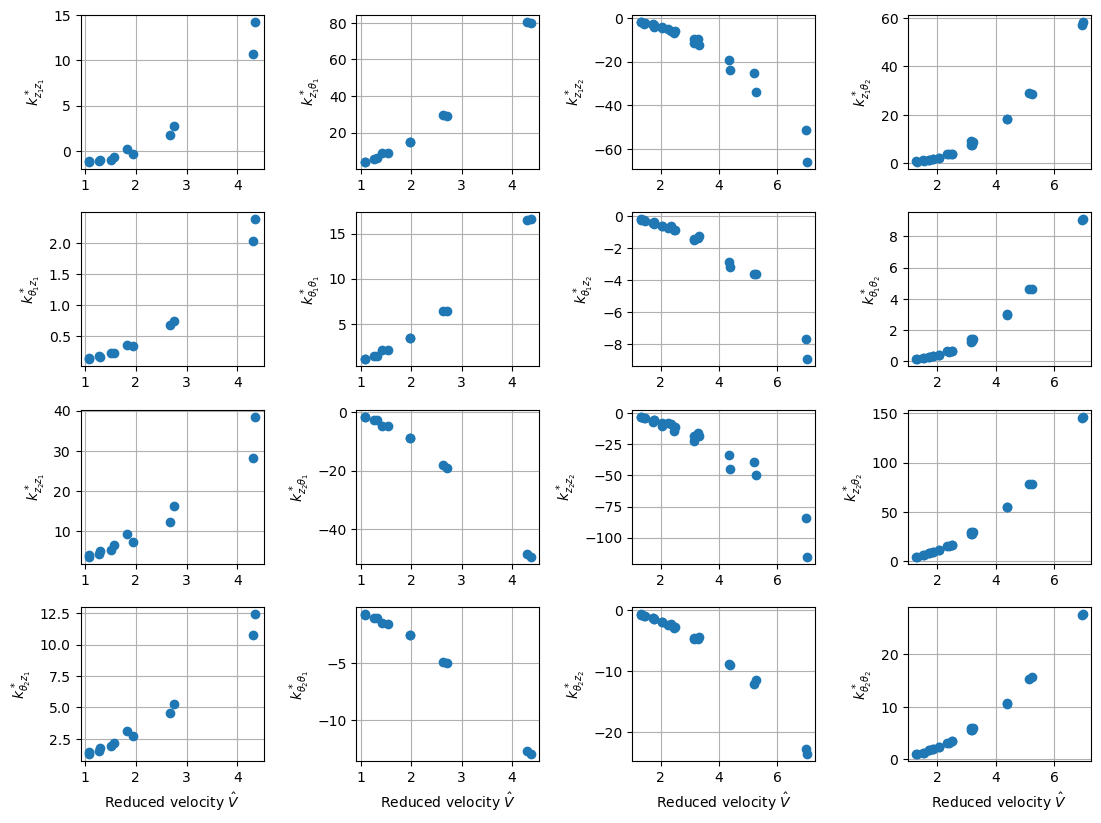

In [6]:
ads_list = []
val_list = []
expf_list = []

fig_damping_1D, _ = plt.subplots(4,4)
fig_stiffness_1D, _ = plt.subplots(4,4)

all_ads_gap1D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap1D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap1D.append(ads_DS)

all_ads_gap1D.plot(fig_damping = fig_damping_1D, fig_stiffness=fig_stiffness_1D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_1D_damping.png')
fig_damping_1D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_1D_stiffness.png')
fig_stiffness_1D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

In [7]:
#3D
section_name_US = "MDS_3D_Harmonic"
section_name_DS = "MUS_3D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)

['HAR_INT_MDS_GAP_213D_03_03_01_000', 'HAR_INT_MDS_GAP_213D_03_03_01_001', 'HAR_INT_MDS_GAP_213D_03_03_01_002', 'HAR_INT_MDS_GAP_213D_03_03_02_000', 'HAR_INT_MDS_GAP_213D_03_03_02_001', 'HAR_INT_MDS_GAP_213D_03_03_02_002', 'HAR_INT_MDS_GAP_213D_03_03_03_000', 'HAR_INT_MDS_GAP_213D_03_03_03_001', 'HAR_INT_MDS_GAP_213D_03_03_03_002', 'HAR_INT_MDS_GAP_213D_03_03_04_001', 'HAR_INT_MDS_GAP_213D_03_03_04_002', 'HAR_INT_MDS_GAP_213D_03_03_04_003', 'HAR_INT_MDS_GAP_213D_03_03_04_004']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11, 12], dtype=int64)]
['HAR_INT_MUS_GAP_213D_03_02_01_000', 'HAR_INT_MUS_GAP_213D_03_02_01_001', 'HAR_INT_MUS_GAP_213D_03_02_01_002', 'HAR_INT_MUS_GAP_213D_03_02_02_000', 'HAR_INT_MUS_GAP_213D_03_02_02_001', 'HAR_INT_MUS_GAP_213D_03_02_02_003', 'HAR_INT_MUS_GAP_213D_03_02_03_000', 'HAR_INT_MUS_GAP_213D_03_02_03_001', 'HAR_INT_MUS_GAP_213D_03_02_03_002', 'HAR_INT_MUS_GAP_213D_03_02_04_000', 'HAR_INT_MUS_GA

Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_03_01_001
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_03_01_002
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_02_01_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_02_01_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_03_02_001
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_03_02_002
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_02_02_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_02_02_003
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_03_03_001
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_03_03_002
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_02_03_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_213D_03_02_03_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_03_04_002
Processing US: Wind tunnel experiment:

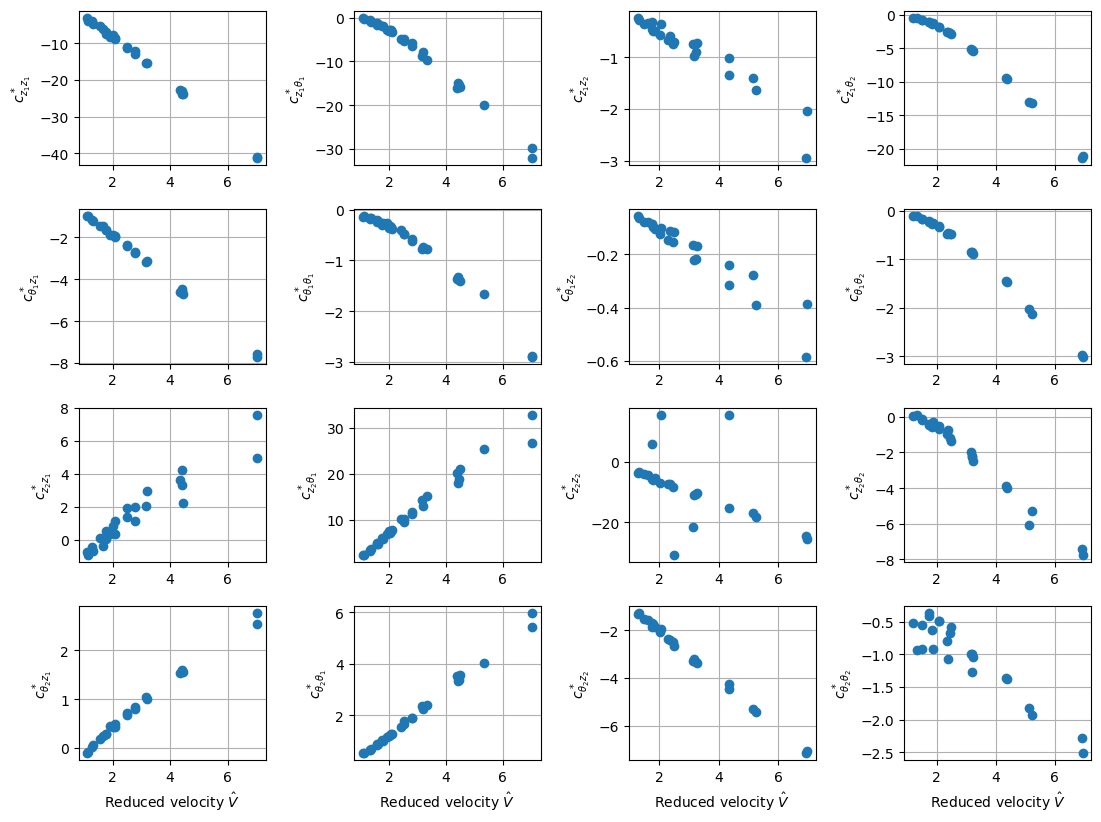

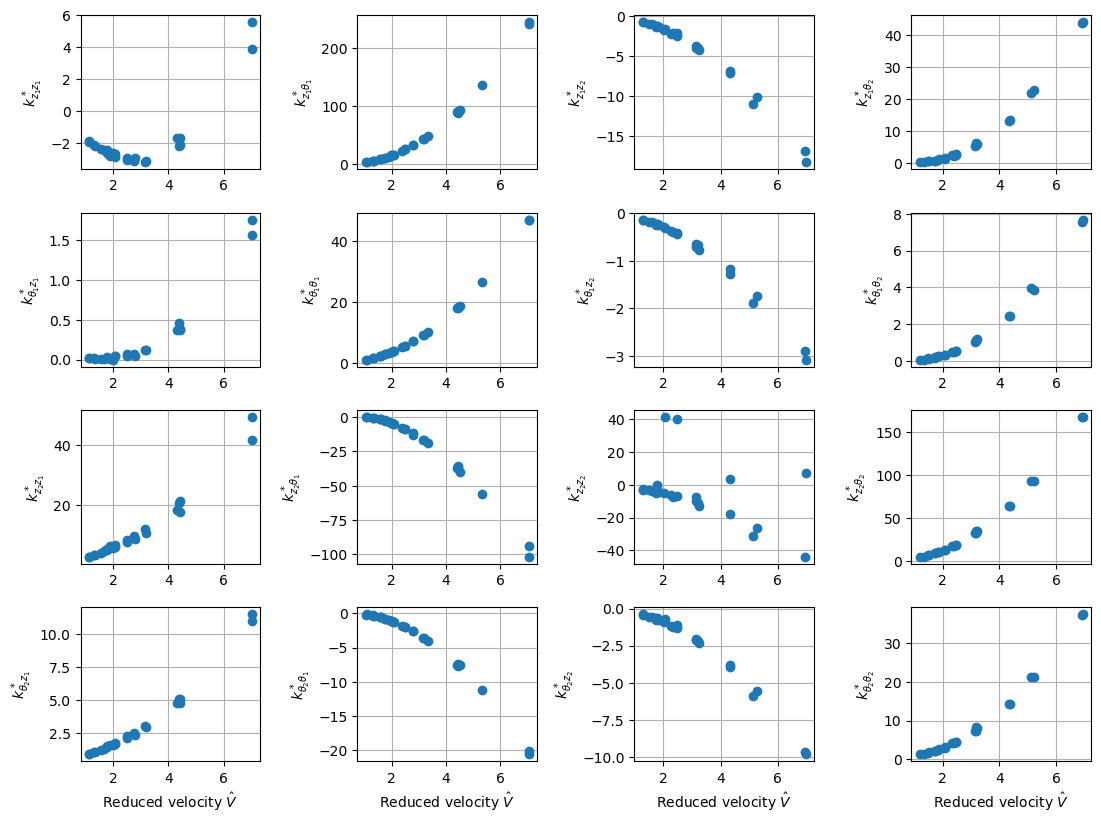

In [8]:
ads_list = []
val_list = []
expf_list = []

fig_damping_3D, _ = plt.subplots(4,4)
fig_stiffness_3D, _ = plt.subplots(4,4)

all_ads_gap3D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap3D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap3D.append(ads_DS)

all_ads_gap3D.plot(fig_damping = fig_damping_3D, fig_stiffness=fig_stiffness_3D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_3D_damping.png')
fig_damping_3D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_3D_stiffness.png')
fig_stiffness_3D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

In [9]:
#4D
section_name_US = "MDS_4D_Harmonic"
section_name_DS = "MUS_4D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)

['HAR_INT_MDS_GAP_45D_03_01_01_003', 'HAR_INT_MDS_GAP_45D_03_01_01_004', 'HAR_INT_MDS_GAP_45D_03_01_01_006', 'HAR_INT_MDS_GAP_45D_03_01_02_002', 'HAR_INT_MDS_GAP_45D_03_01_02_003', 'HAR_INT_MDS_GAP_45D_03_01_02_004', 'HAR_INT_MDS_GAP_45D_03_01_03_002', 'HAR_INT_MDS_GAP_45D_03_01_03_003', 'HAR_INT_MDS_GAP_45D_03_01_03_004', 'HAR_INT_MDS_GAP_45D_03_01_04_001', 'HAR_INT_MDS_GAP_45D_03_01_04_002', 'HAR_INT_MDS_GAP_45D_03_01_04_003']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11], dtype=int64)]
['HAR_INT_MUS_GAP_45D_03_01_01_000', 'HAR_INT_MUS_GAP_45D_03_01_01_001', 'HAR_INT_MUS_GAP_45D_03_01_01_002', 'HAR_INT_MUS_GAP_45D_03_01_02_000', 'HAR_INT_MUS_GAP_45D_03_01_02_001', 'HAR_INT_MUS_GAP_45D_03_01_02_002', 'HAR_INT_MUS_GAP_45D_03_01_03_000', 'HAR_INT_MUS_GAP_45D_03_01_03_001', 'HAR_INT_MUS_GAP_45D_03_01_03_002', 'HAR_INT_MUS_GAP_45D_03_01_04_000', 'HAR_INT_MUS_GAP_45D_03_01_04_001', 'HAR_INT_MUS_GAP_45D_03_01_04_002']
[array

Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_01_01_004
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_01_01_006
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_01_01_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_01_01_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_01_02_003
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_01_02_004
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_01_02_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_01_02_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_01_03_003
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_01_03_004
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_01_03_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_01_03_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_01_04_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS

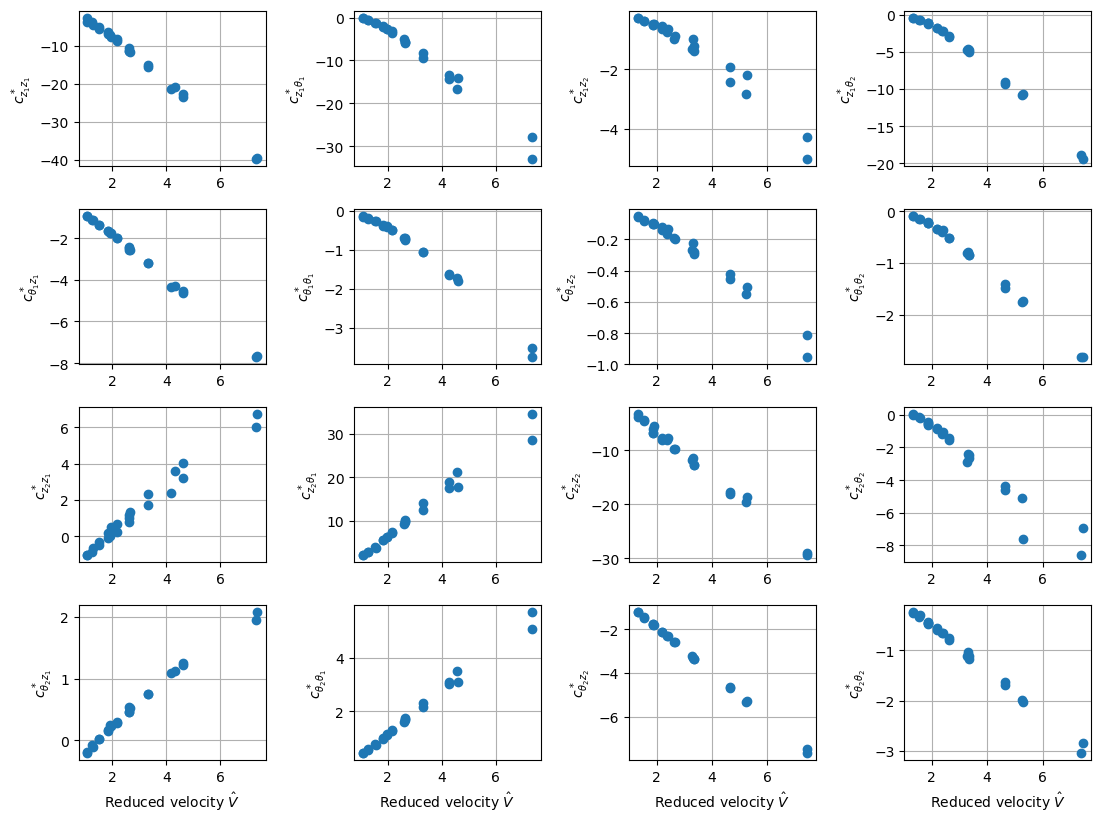

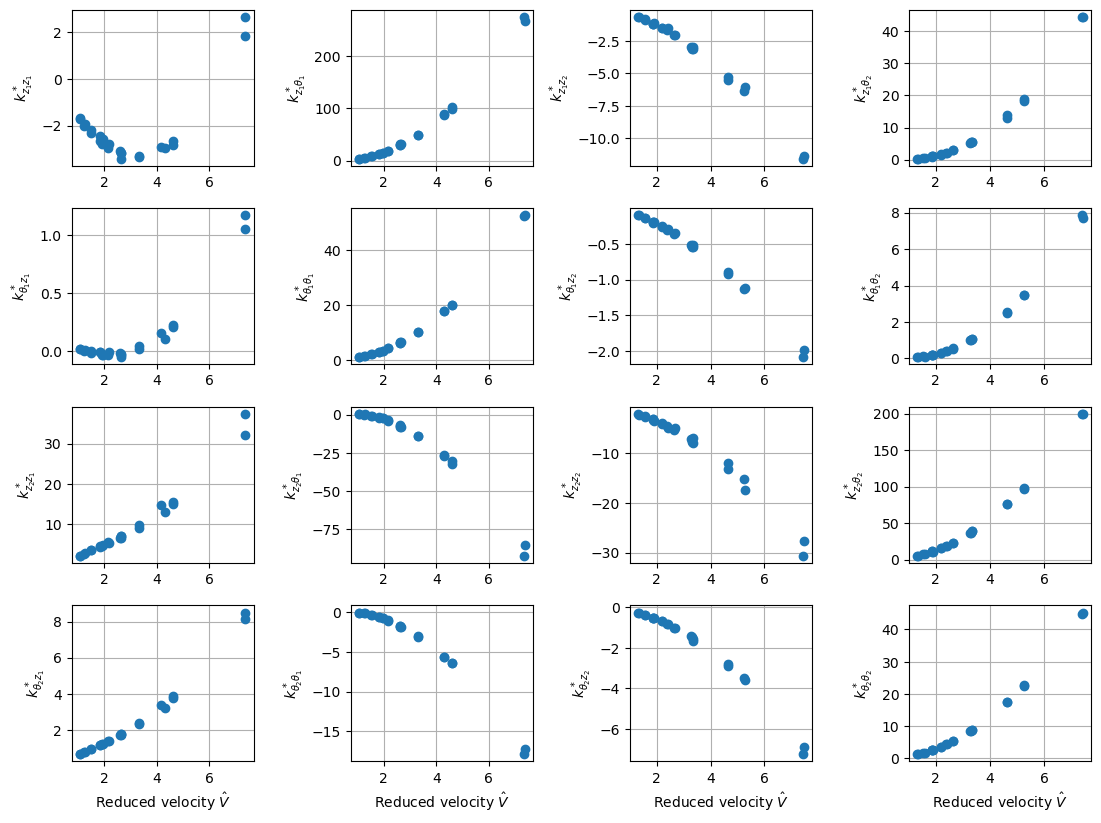

In [10]:
ads_list = []
val_list = []
expf_list = []

fig_damping_4D, _ = plt.subplots(4,4)
fig_stiffness_4D, _ = plt.subplots(4,4)

all_ads_gap4D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap4D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap4D.append(ads_DS)

all_ads_gap4D.plot(fig_damping = fig_damping_4D, fig_stiffness=fig_stiffness_4D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_4D_damping.png')
fig_damping_4D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_4D_stiffness.png')
fig_stiffness_4D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

In [11]:
#5D
section_name_US = "MDS_5D_Harmonic"
section_name_DS = "MUS_5D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)

['HAR_INT_MDS_GAP_45D_03_02_01_001', 'HAR_INT_MDS_GAP_45D_03_02_01_002', 'HAR_INT_MDS_GAP_45D_03_02_01_003', 'HAR_INT_MDS_GAP_45D_03_02_02_001', 'HAR_INT_MDS_GAP_45D_03_02_02_002', 'HAR_INT_MDS_GAP_45D_03_02_02_003', 'HAR_INT_MDS_GAP_45D_03_02_03_001', 'HAR_INT_MDS_GAP_45D_03_02_03_002', 'HAR_INT_MDS_GAP_45D_03_02_03_004', 'HAR_INT_MDS_GAP_45D_03_02_04_001', 'HAR_INT_MDS_GAP_45D_03_02_04_002', 'HAR_INT_MDS_GAP_45D_03_02_04_003']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 11], dtype=int64)]
['HAR_INT_MUS_GAP_45D_03_02_01_000', 'HAR_INT_MUS_GAP_45D_03_02_01_001', 'HAR_INT_MUS_GAP_45D_03_02_01_002', 'HAR_INT_MUS_GAP_45D_03_02_02_000', 'HAR_INT_MUS_GAP_45D_03_02_02_001', 'HAR_INT_MUS_GAP_45D_03_02_02_002', 'HAR_INT_MUS_GAP_45D_03_02_03_000', 'HAR_INT_MUS_GAP_45D_03_02_03_001', 'HAR_INT_MUS_GAP_45D_03_02_03_002', 'HAR_INT_MUS_GAP_45D_03_02_04_000', 'HAR_INT_MUS_GAP_45D_03_02_04_001', 'HAR_INT_MUS_GAP_45D_03_02_04_002']
[array([0,

Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_01_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_01_003
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_02_01_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_02_01_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_02_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_02_003
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_02_02_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_02_02_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_03_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_03_004
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_02_03_001
Processing DS: Wind tunnel experiment: /HAR_INT_MUS_GAP_45D_03_02_03_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_45D_03_02_04_003
Processing DS: Wind tunnel experiment: /HAR_INT_MUS

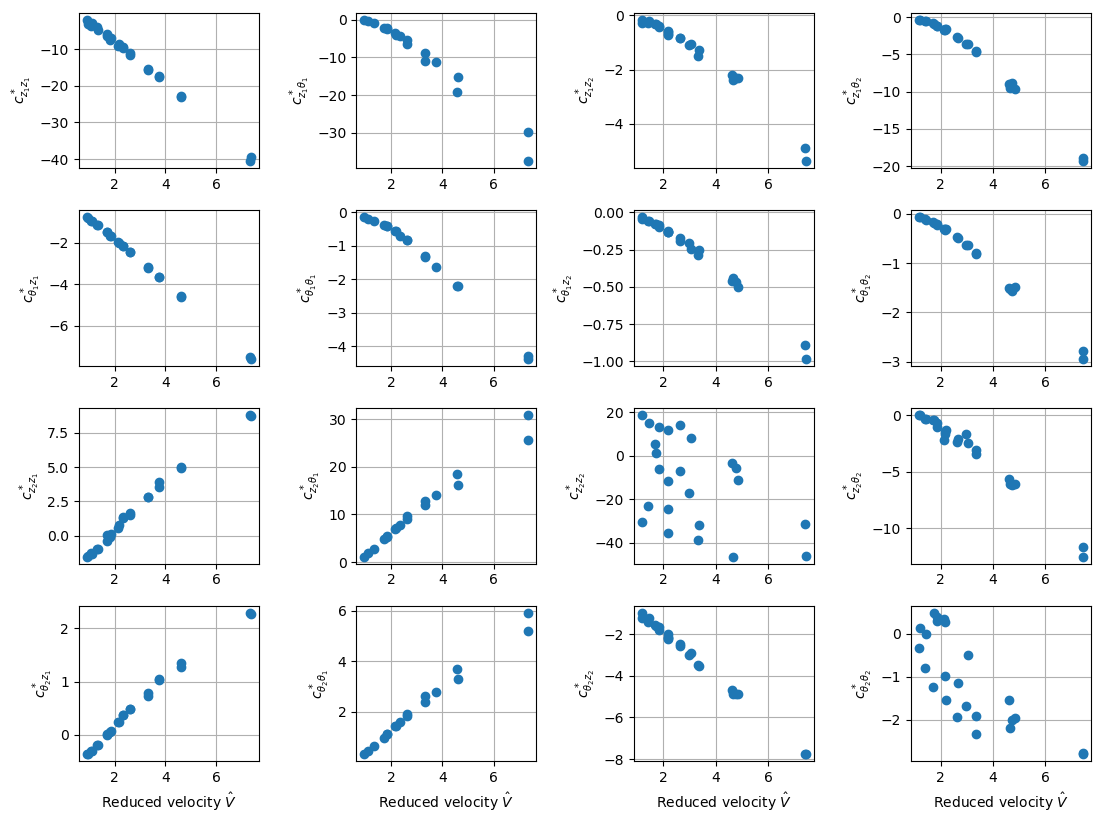

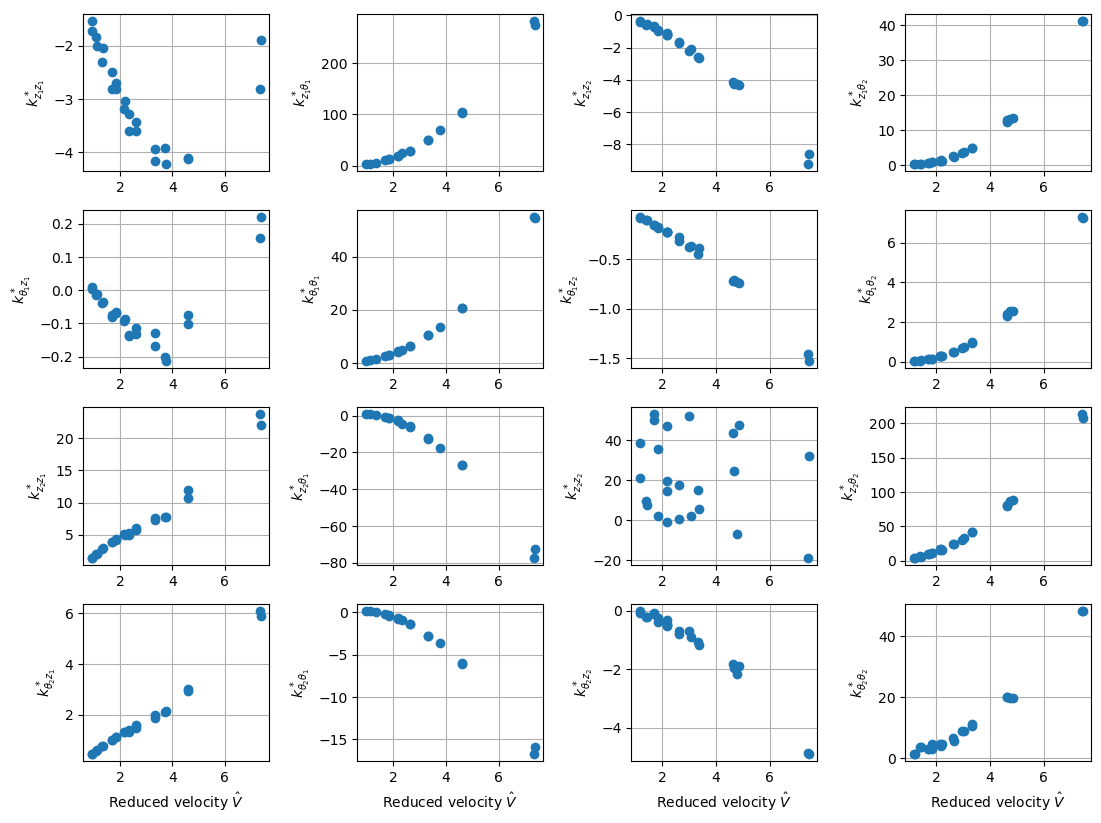

In [12]:
ads_list = []
val_list = []
expf_list = []

fig_damping_5D, _ = plt.subplots(4,4)
fig_stiffness_5D, _ = plt.subplots(4,4)

all_ads_gap5D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap5D.append(ads_US)

    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap5D.append(ads_DS)

all_ads_gap5D.plot(fig_damping = fig_damping_5D, fig_stiffness=fig_stiffness_5D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_5D_damping.png')
fig_damping_5D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_5D_stiffness.png')
fig_stiffness_5D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

ads_list = []
val_list = []
expf_list = []

fig_damping_2D, _ = plt.subplots(4,4)
fig_stiffness_2D, _ = plt.subplots(4,4)

all_ads_gap2D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        try:
            ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(
                exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True
            )
            ads_list.append(ads_US)
            val_list.append(val_US)
            expf_list.append(expf_US)
            all_ads_gap2D.append(ads_US)
        except IndexError as e:
            print(f"⚠️ Skipping US test {exp1} due to missing peaks or data. Error: {e}")
            exp1.plot_experiment()
        except Exception as e:
            print(f"❌ Unexpected error with US test {exp1}: {e}")
        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        try:
            ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(
                exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False
            )
            ads_list.append(ads_DS)
            val_list.append(val_DS)
            expf_list.append(expf_DS)
            all_ads_gap2D.append(ads_DS)
        except IndexError as e:
            print(f"⚠️ Skipping DS test {exp1} due to missing peaks or data. Error: {e}")
            exp1.plot_experiment()
        except Exception as e:
            print(f"❌ Unexpected error with DS test {exp1}: {e}")

 

all_ads_gap2D.plot(fig_damping = fig_damping_2D, fig_stiffness=fig_stiffness_2D)

plt.show()
